## Einfache Lineare Regression



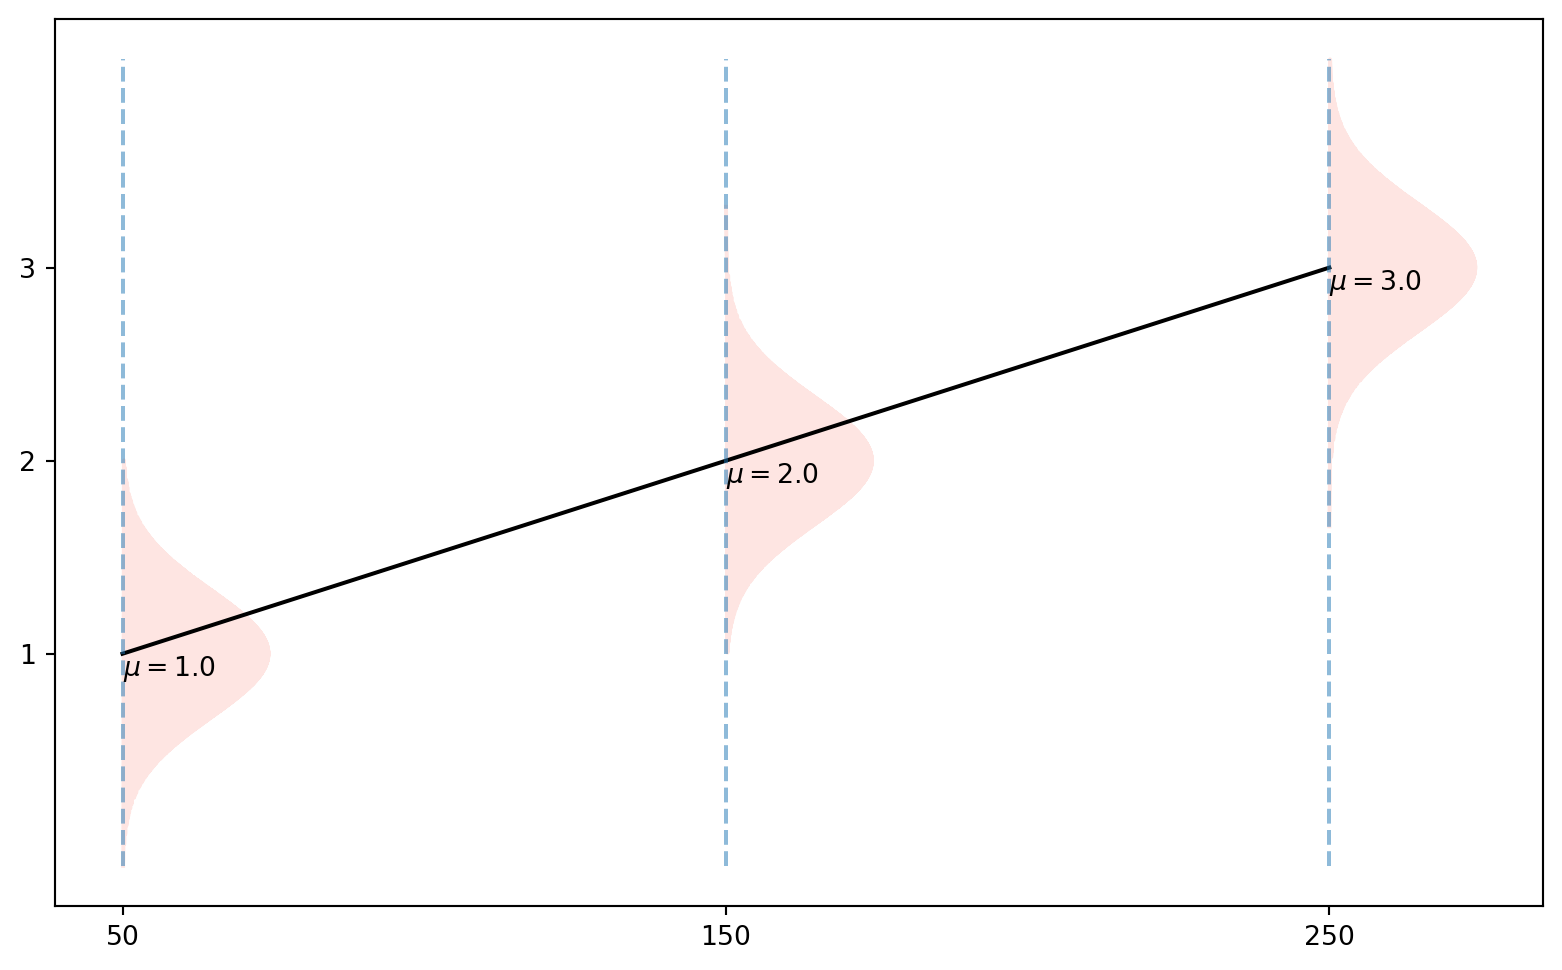

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define variables
x_breaks = np.array([50, 150, 250])
y_hat = 0.5 + 0.01 * x_breaks

# Create a DataFrame similar to expand_grid in R
dt = pd.DataFrame(np.array(np.meshgrid(np.arange(1, 2001), x_breaks)).T.reshape(-1,2), columns=['B', 'x'])

# Add mu, y, and dy columns
dt['mu'] = 0.5 + 0.01 * dt['x']
dt['y'] = np.random.normal(loc=dt['mu'], scale=0.33)
dt['dy'] = dt['x'] + 20 * norm.pdf(dt['y'], loc=dt['mu'], scale=0.33)

# Sort values
dt = dt.sort_values(['x', 'dy'])

# Plotting
plt.figure(figsize=(10, 6))

# Assuming 'invoices' is a DataFrame with 'Invoices' and 'Time' columns
# plt.scatter(invoices['Invoices'], invoices['Time'], alpha=0.5)

for x_val in dt['x'].unique():
    dt_x = dt[dt['x'] == x_val]
    plt.plot(dt_x['dy'], dt_x['y'], alpha=0.2, color='salmon')

plt.plot(dt['x'], dt['mu'], color='black')
plt.vlines(x_breaks, ymin=dt['y'].min(), ymax=dt['y'].max(), linestyles='dashed', alpha=0.5)

for x_val, y_val in zip(x_breaks, y_hat):
    plt.text(x_val, y_val, r'$\mu = {}$'.format(round(y_val, 1)), va='top')

plt.xticks(x_breaks)
plt.yticks(0.5 + 0.01 * x_breaks)
plt.show()